## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from clique_finding_models.analysis import load_experiment_results, get_exp_ids_from_sacred_dir, \
    process_exp_results_to_df

## Load configs and metrics

In [2]:
SACRED_DIR = os.path.join(os.getcwd(), "outputs", "sacred")
exp_ids = get_exp_ids_from_sacred_dir(SACRED_DIR)
exp_results = [load_experiment_results(os.path.join(SACRED_DIR, str(exp_id)))
               for exp_id in exp_ids]
results = process_exp_results_to_df(exp_ids, exp_results, [])
results.head()

,exp_id,transform_y,model,batch_size,tag,data_set,epochs,status,train,val.top1,...,val.top5,train.top5,val.frac_mc,val.mse,train.mae,val.mae,train.loss,train.top1,train.mse,train.avep
0,1,relative_to_degree,chebnet,32,dsjc20,dsjc20,157,COMPLETED,True,0.97,...,0.944,0.9775,0.926897,0.540837,0.4775,0.537366,0.00312,0.99,0.433235,0.975154
1,2,relative_to_degree,chebnet,32,dsjc20,dsjc20,1,COMPLETED,False,0.97,...,0.944,NaN,0.926897,0.540837,NaN,0.537366,NaN,NaN,NaN,NaN
2,3,relative_to_degree,chebnet,32,dsjc20,rb5-4,1,COMPLETED,False,0.94,...,0.934,NaN,0.836037,0.783826,NaN,0.687273,NaN,NaN,NaN,NaN
3,4,relative_to_degree,chebnet,32,dsjc20,C.20.5,1,COMPLETED,False,0.91,...,0.866,NaN,0.787954,0.752288,NaN,0.667126,NaN,NaN,NaN,NaN
4,5,relative_to_degree,chebnet,32,dsjc20,C.20.9,1,COMPLETED,False,0.95,...,0.908,NaN,0.839774,40.727511,NaN,6.253310,NaN,NaN,NaN,NaN


In [3]:
results["tr_on"] = results["tag"]
results["ev_on"] = results["data_set"]
results.loc[results.tr_on == "all", "tr_on"] = "All"
results.loc[results.ev_on == "small_dimacs_bhoslib_500", "ev_on"] = "All"
results.loc[results.ev_on == "small_dimacs_bhoslib_500_no_hamming", "ev_on"] = "All"

results.loc[(results.model == "s2v2") & (results.transform_y == "none"), "model"] = "s2v+abs"
results.loc[(results.model == "chebnet") & (results.transform_y == "relative_to_degree"), "model"] = "chebnet+rel_deg"
results.loc[(results.model == "chebnet") & (results.transform_y == "none"), "model"] = "chebnet+rank"

results.head()

,exp_id,transform_y,model,batch_size,tag,data_set,epochs,status,train,val.top1,...,val.frac_mc,val.mse,train.mae,val.mae,train.loss,train.top1,train.mse,train.avep,tr_on,ev_on
0,1,relative_to_degree,chebnet+rel_deg,32,dsjc20,dsjc20,157,COMPLETED,True,0.97,...,0.926897,0.540837,0.4775,0.537366,0.00312,0.99,0.433235,0.975154,dsjc20,dsjc20
1,2,relative_to_degree,chebnet+rel_deg,32,dsjc20,dsjc20,1,COMPLETED,False,0.97,...,0.926897,0.540837,NaN,0.537366,NaN,NaN,NaN,NaN,dsjc20,dsjc20
2,3,relative_to_degree,chebnet+rel_deg,32,dsjc20,rb5-4,1,COMPLETED,False,0.94,...,0.836037,0.783826,NaN,0.687273,NaN,NaN,NaN,NaN,dsjc20,rb5-4
3,4,relative_to_degree,chebnet+rel_deg,32,dsjc20,C.20.5,1,COMPLETED,False,0.91,...,0.787954,0.752288,NaN,0.667126,NaN,NaN,NaN,NaN,dsjc20,C.20.5
4,5,relative_to_degree,chebnet+rel_deg,32,dsjc20,C.20.9,1,COMPLETED,False,0.95,...,0.839774,40.727511,NaN,6.253310,NaN,NaN,NaN,NaN,dsjc20,C.20.9


## Loss evaluated on graph type from training

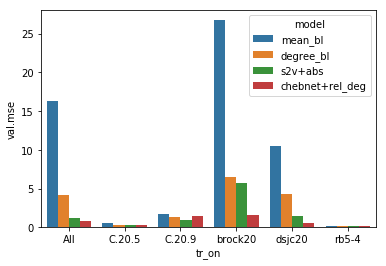

In [4]:
trained = results[(results.tr_on == results.ev_on)].sort_values("tr_on")
mse_model_order = ["mean_bl", "degree_bl", "s2v+abs", "chebnet+rel_deg"]

grid = sns.barplot("tr_on", "val.mse", hue="model", hue_order=mse_model_order, data=trained.sort_values("tr_on"))
#grid.set_ylim((0, 7))

(0.6, 1)

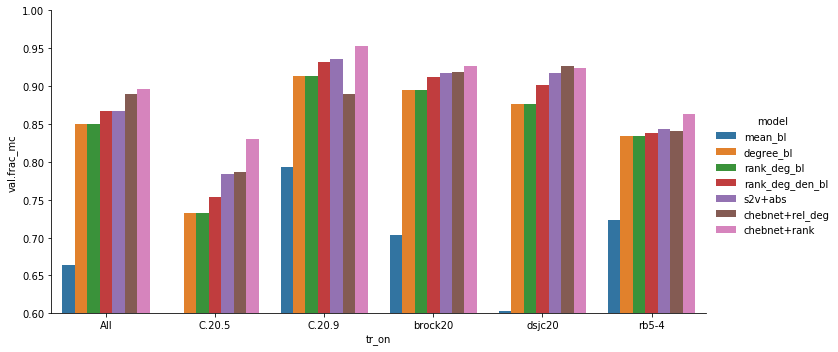

In [5]:
rank_model_order = ["mean_bl", "degree_bl", "rank_deg_bl", "rank_deg_den_bl", "s2v+abs", "chebnet+rel_deg", "chebnet+rank"]
grid = sns.catplot("tr_on", "val.frac_mc", hue="model", hue_order=rank_model_order, data=trained, kind="bar", aspect=2)
grid.axes[0,0].set_ylim((0.6, 1))

(0.6, 1)

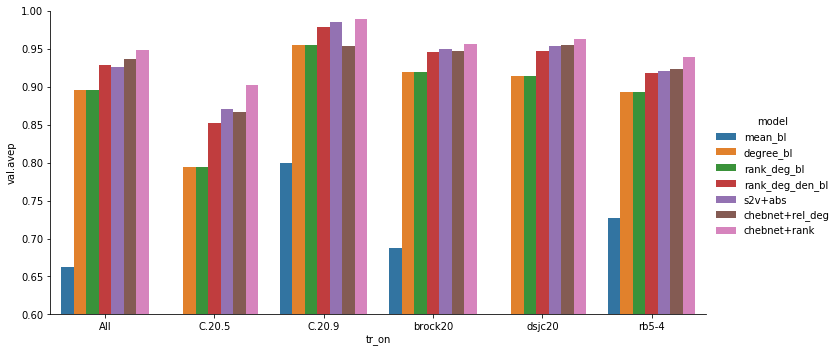

In [6]:
grid = sns.catplot("tr_on", "val.avep", hue="model", hue_order=rank_model_order, data=trained, kind="bar", aspect=2)
grid.axes[0,0].set_ylim((0.6, 1))

(0.6, 1)

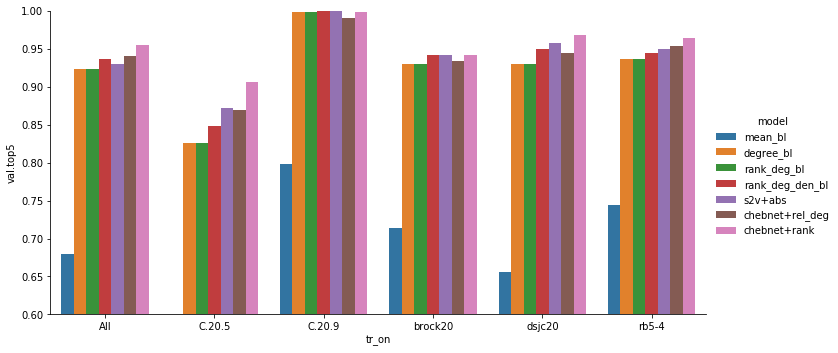

In [7]:
grid = sns.catplot("tr_on", "val.top5", hue="model", hue_order=rank_model_order, data=trained, kind="bar", aspect=2)
grid.axes[0,0].set_ylim((0.6, 1))

In [8]:
results.loc[results.tr_on == results.ev_on, 
            ["data_set", "model", "exp_id", "val.mse", "val.frac_mc", "val.avep", "val.top5"]
           ].sort_values("data_set").head(10)

,data_set,model,exp_id,val.mse,val.frac_mc,val.avep,val.top5
143,C.20.5,mean_bl,144,5.822430e-01,0.497380,0.511000,0.486
140,C.20.5,mean_bl,141,5.822430e-01,0.497380,0.511000,0.486
101,C.20.5,s2v+abs,102,2.941064e-01,0.783438,0.870578,0.872
98,C.20.5,s2v+abs,99,2.941064e-01,0.783438,0.870578,0.872
224,C.20.5,rank_deg_bl,225,2.570900e+01,0.731807,0.794558,0.826
227,C.20.5,rank_deg_bl,228,2.570900e+01,0.731807,0.794558,0.826
185,C.20.5,degree_bl,186,3.657949e-01,0.731807,0.794558,0.826
59,C.20.5,chebnet+rank,60,3.644155e+00,0.830369,0.901802,0.906
56,C.20.5,chebnet+rank,57,3.644155e+00,0.830369,0.901802,0.906
266,C.20.5,rank_deg_den_bl,267,9.544182e+13,0.754029,0.851608,0.848


## Performance comparison on all datasets

### MSE

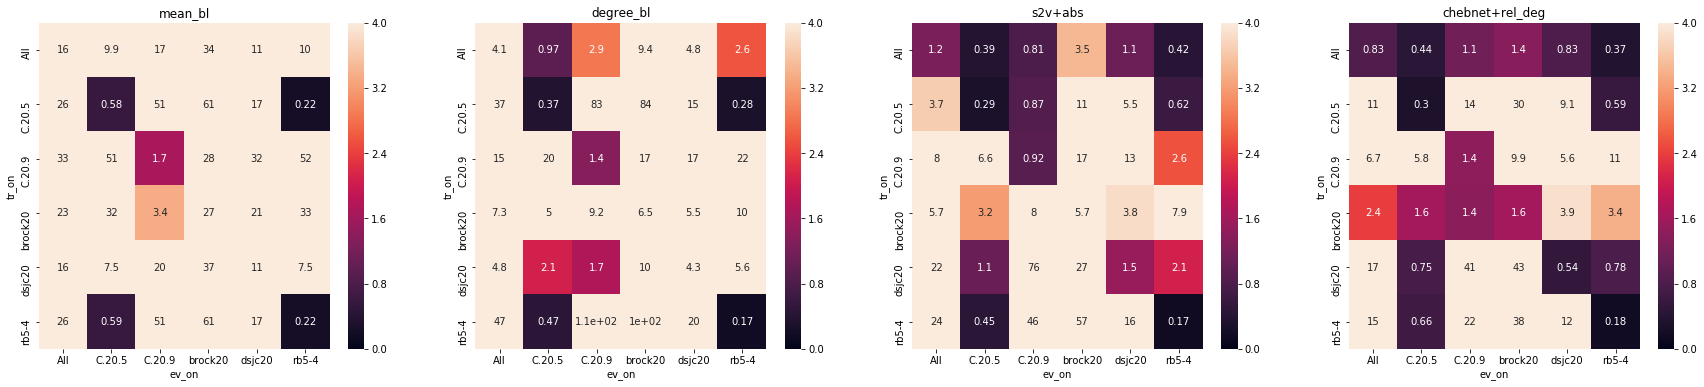

In [9]:
evals = results[results.train == False]
ds_x_ds_x_model = evals.loc[evals.groupby(["tr_on", "ev_on", "model"])["val.mse"].idxmin()]

pivots = []
_, ax = plt.subplots(1, 4, figsize=(30,6))
for i, model in enumerate(["mean_bl", "degree_bl", "s2v+abs", "chebnet+rel_deg"]):
    pivot = ds_x_ds_x_model[ds_x_ds_x_model.model == model].pivot("tr_on", "ev_on", "val.mse")
    pivots.append(pivot)
    sns.heatmap(pivot, annot=True, ax=ax[i], vmin=0, vmax=4)
    ax[i].set_title(model)

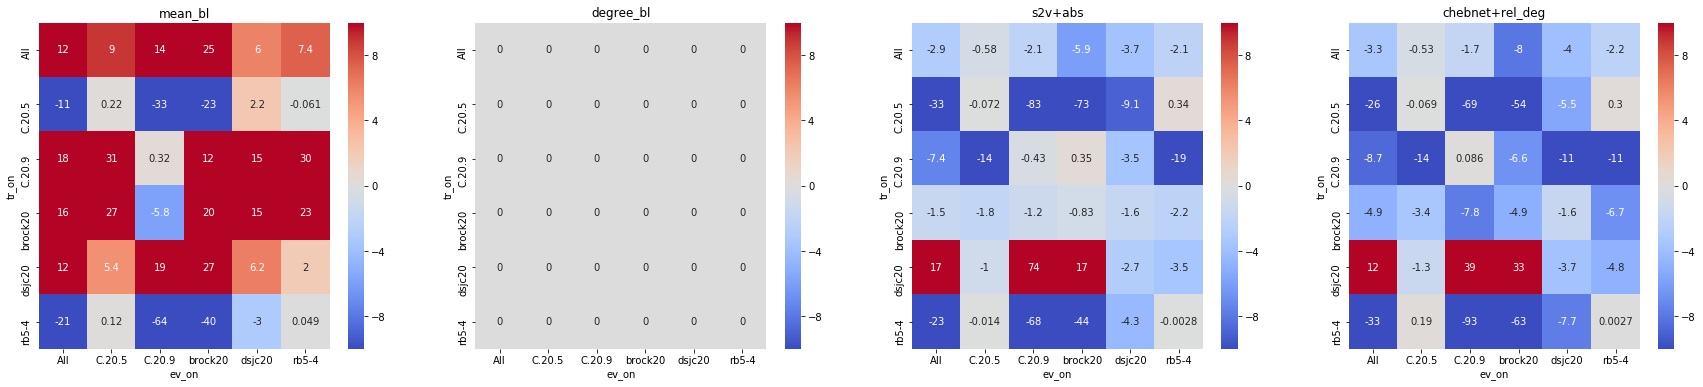

In [10]:
_, ax = plt.subplots(1, 4, figsize=(30,6))
for i, model in enumerate(["mean_bl", "degree_bl", "s2v+abs", "chebnet+rel_deg"]):
    pivot = ds_x_ds_x_model[ds_x_ds_x_model.model == model].pivot("tr_on", "ev_on", "val.mse")
    sns.heatmap(pivot - pivots[1] , annot=True, ax=ax[i], cmap="coolwarm", vmin=-10, vmax=10)
    ax[i].set_title(model)

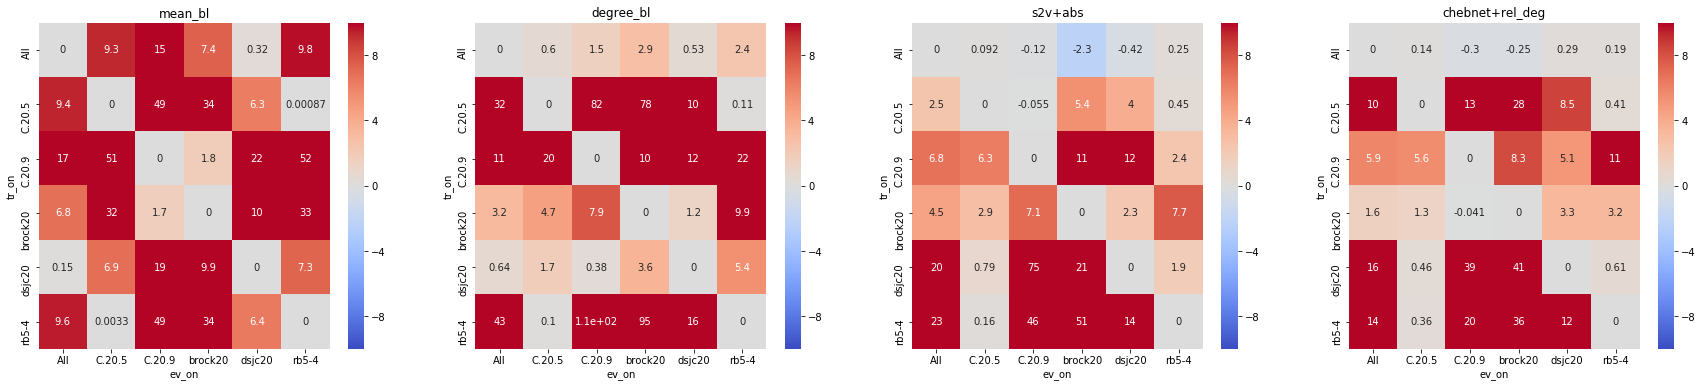

In [11]:
_, ax = plt.subplots(1, 4, figsize=(30,6))
for i, model in enumerate(["mean_bl", "degree_bl", "s2v+abs", "chebnet+rel_deg"]):
    pivot = ds_x_ds_x_model[ds_x_ds_x_model.model == model].pivot("tr_on", "ev_on", "val.mse")
    values = pivot.values
    pivot = pd.DataFrame(values - np.diag(values), columns=pivot.columns, index=pivot.index)
    sns.heatmap(pivot, annot=True, ax=ax[i], cmap="coolwarm", vmin=-10, vmax=10)
    ax[i].set_title(model)

Text(0.5, 1.0, 'generalization error')

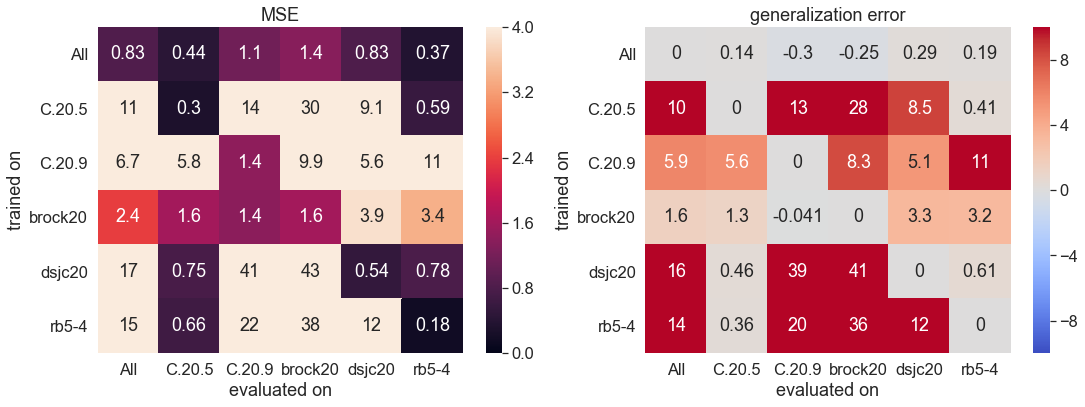

In [12]:
sns.set(font_scale=1.5) 

fig, ax = plt.subplots(1, 2, figsize=(18,6))
data = ds_x_ds_x_model.loc[ds_x_ds_x_model.model == "chebnet+rel_deg", :]
data = data.rename(index=str, columns={"tr_on": "trained on", "ev_on": "evaluated on"})

pivot = data.pivot("trained on", "evaluated on", "val.mse")
values = pivot.values
pivot_diff = pd.DataFrame(values - np.diag(values), columns=pivot.columns, index=pivot.index)

sns.heatmap(pivot, annot=True, ax=ax[0], vmin=0, vmax=4)
ax[0].set_title("MSE")

sns.heatmap(pivot_diff, annot=True, ax=ax[1], cmap="coolwarm", vmin=-10, vmax=10)
ax[1].set_title("generalization error")
# fig.savefig("outputs/gen-struc-mse.png", dpi=300)

## Ranking

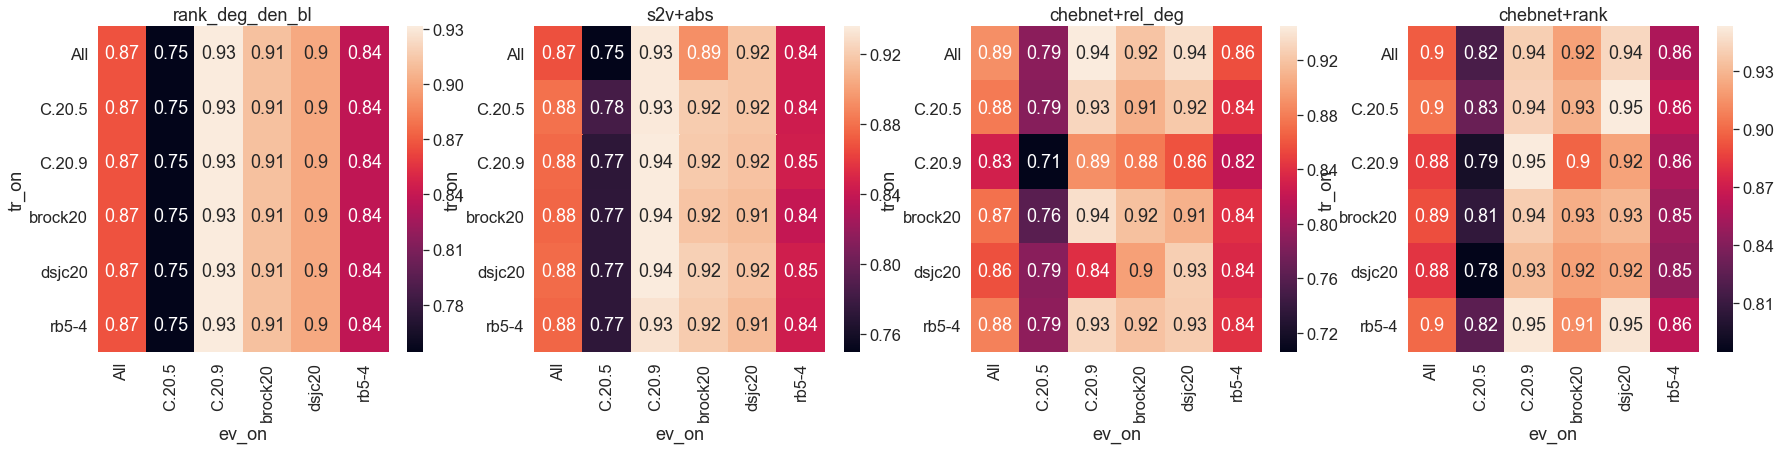

In [13]:
evals = results[results.train == False]
ds_x_ds_x_model = evals.loc[evals.groupby(["tr_on", "ev_on", "model"])["val.frac_mc"].idxmax()]

pivots = []
_, ax = plt.subplots(1, 4, figsize=(30,6))
for i, model in enumerate(["rank_deg_den_bl", "s2v+abs", "chebnet+rel_deg", "chebnet+rank"]):
    pivot = ds_x_ds_x_model[ds_x_ds_x_model.model == model].pivot("tr_on", "ev_on", "val.frac_mc")
    pivots.append(pivot)
    sns.heatmap(pivot, annot=True, ax=ax[i])
    ax[i].set_title(model)

### Improvement compared to baselines

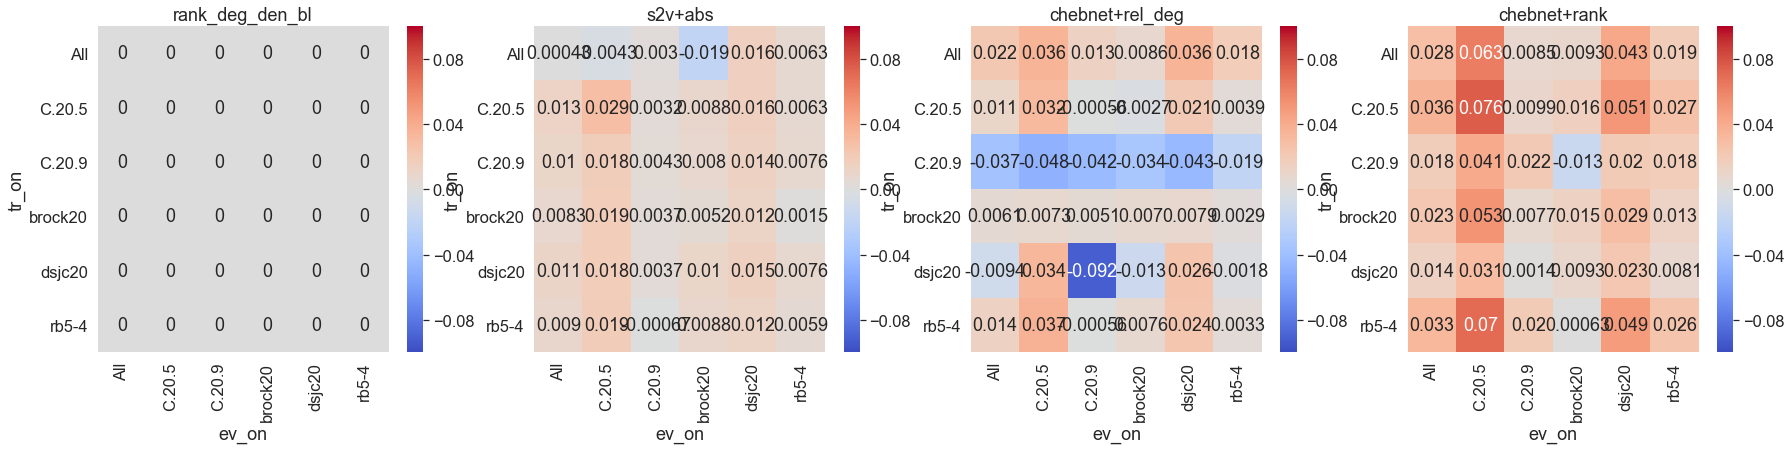

In [14]:
_, ax = plt.subplots(1, 4, figsize=(30,6))
for i, model in enumerate(["rank_deg_den_bl", "s2v+abs", "chebnet+rel_deg", "chebnet+rank"]):
    pivot = ds_x_ds_x_model[ds_x_ds_x_model.model == model].pivot("tr_on", "ev_on", "val.frac_mc")
    sns.heatmap(pivot - pivots[0] , annot=True, ax=ax[i], cmap="coolwarm", vmin=-0.1, vmax=0.1)
    ax[i].set_title(model)

### Generalization
Increase of loss compared to perfornce of the model on the training set.

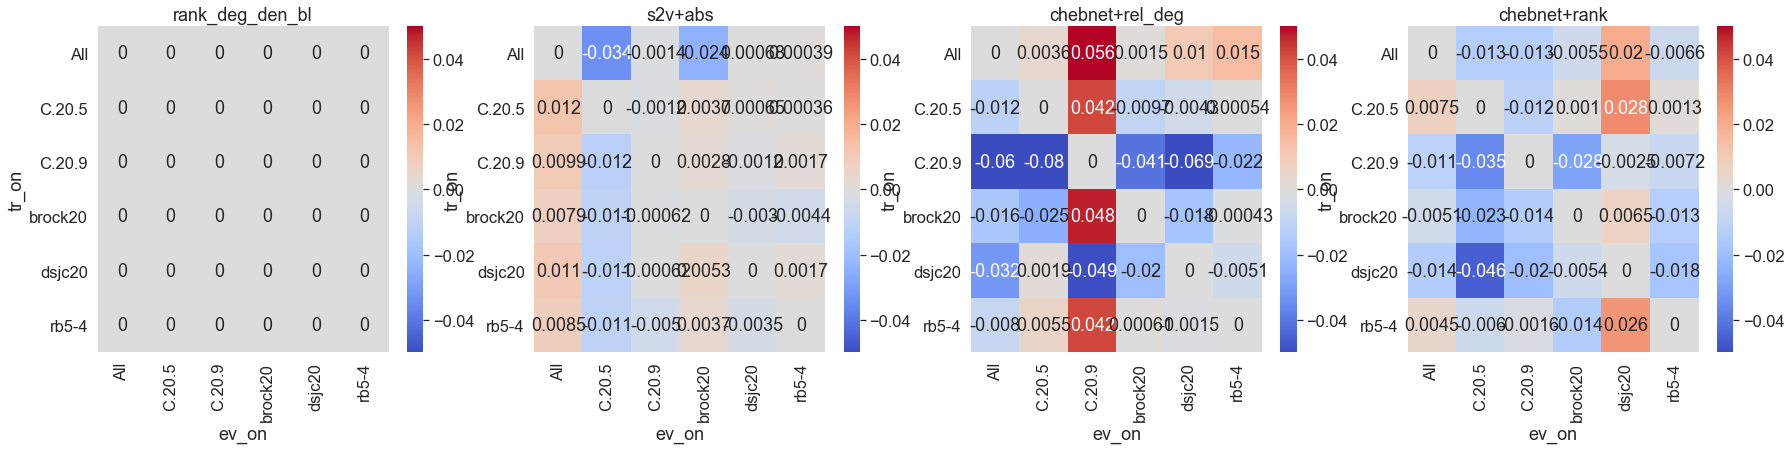

In [15]:
_, ax = plt.subplots(1, 4, figsize=(30,6))
for i, model in enumerate(["rank_deg_den_bl", "s2v+abs", "chebnet+rel_deg", "chebnet+rank"]):
    pivot = ds_x_ds_x_model[ds_x_ds_x_model.model == model].pivot("tr_on", "ev_on", "val.frac_mc")
    values = pivot.values
    pivot = pd.DataFrame(values - np.diag(values), columns=pivot.columns, index=pivot.index)
    sns.heatmap(pivot, annot=True, ax=ax[i], vmin=-0.05, vmax=0.05, cmap="coolwarm")
    ax[i].set_title(model)

Text(0.5, 1.0, 'generalization error')

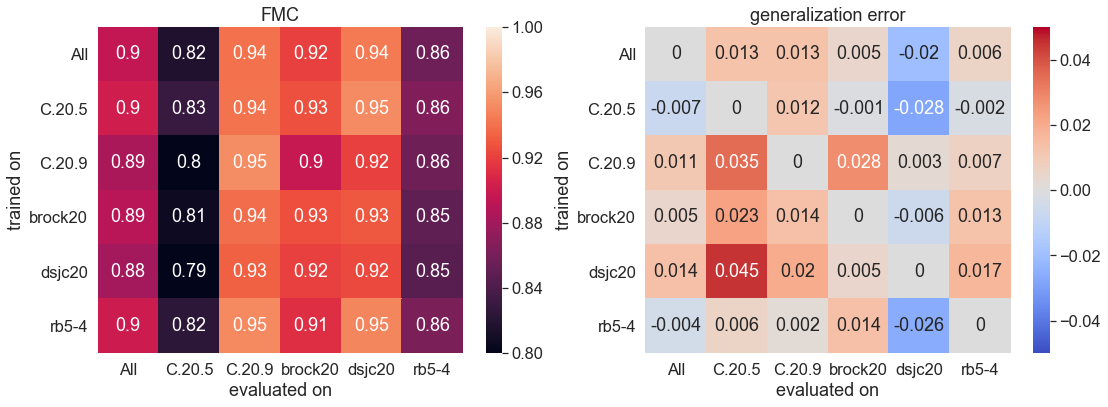

In [16]:
sns.set(font_scale=1.5) 

fig, ax = plt.subplots(1, 2, figsize=(18,6))
data = ds_x_ds_x_model.loc[ds_x_ds_x_model.model == "chebnet+rank", :].round(3)
data = data.rename(index=str, columns={"tr_on": "trained on", "ev_on": "evaluated on"})

pivot = data.pivot("trained on", "evaluated on", "val.frac_mc")
values = pivot.values
pivot_diff = pd.DataFrame((np.diag(values) - values), columns=pivot.columns, index=pivot.index)

sns.heatmap(pivot, annot=True, ax=ax[0], vmin=0.8, vmax=1)
ax[0].set_title("FMC")

sns.heatmap(pivot_diff, annot=True, ax=ax[1], cmap="coolwarm", vmin=-0.05, vmax=0.05)
ax[1].set_title("generalization error")
# fig.savefig("outputs/gen-struc-fmc.png", dpi=300)